In [184]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
import csv
import pandas as pd
import random
import matplotlib.pyplot as plt

In [185]:
data=[]
with open('result/result_simple.csv', 'r') as f: 
    csvfile=csv.reader(f)
    for each_row in csvfile: 
        data.append(each_row)

In [186]:
df=pd.DataFrame(data, columns=['player_1', 'player_2', 'result'])
df.head()

,player_1,player_2,result
0,p,p,Tie
1,s,p,Player 1 Win
2,s,r,Player 1 Lose
3,s,r,Player 1 Lose
4,r,r,Tie


In [187]:
df.groupby(['player_1', 'player_2']).count()

result
player_1 player_2        
p        p              9
         r             13
         s             11
r        p              9
         r             12
         s             15
s        p             15
         r              8
         s              8

In [188]:
pd.read_csv('result/result_simple.csv', header=None, names=['player_1', 'player_2', 'result'])

,player_1,player_2,result
0,p,p,Tie
1,s,p,Player 1 Win
2,s,r,Player 1 Lose
3,s,r,Player 1 Lose
4,r,r,Tie
...,...,...,...
95,s,r,Player 1 Lose
96,r,s,Player 1 Win
97,s,p,Player 1 Win
98,r,r,Tie


In [189]:
df.loc[df.loc[:, 'player_1']=='s']['player_2'].value_counts()

p    15
s     8
r     8
Name: player_2, dtype: int64

In [190]:
df=pd.read_csv('result/result_simple.csv', header=None, names=['player_1', 'player_2', 'result'])
X=df[['player_1', 'player_2']]
ohencoder=OneHotEncoder()
X_transformed=ohencoder.fit_transform(X)
transformed=pd.DataFrame(X_transformed.toarray(), columns=ohencoder.get_feature_names(['player_1', 'player_2']))
transformed['result']=df['result']
transformed

,player_1_p,player_1_r,player_1_s,player_2_p,player_2_r,player_2_s,result
0,1.0,0.0,0.0,1.0,0.0,0.0,Tie
1,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win
2,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose
3,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose
4,0.0,1.0,0.0,0.0,1.0,0.0,Tie
...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose
96,0.0,1.0,0.0,0.0,0.0,1.0,Player 1 Win
97,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win
98,0.0,1.0,0.0,0.0,1.0,0.0,Tie


In [191]:
y=df['result']
clf=tree.DecisionTreeClassifier()
clf.fit(X_transformed, y)
transformed['predicted']=clf.predict(X_transformed)
transformed

,player_1_p,player_1_r,player_1_s,player_2_p,player_2_r,player_2_s,result,predicted
0,1.0,0.0,0.0,1.0,0.0,0.0,Tie,Tie
1,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win,Player 1 Win
2,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose,Player 1 Lose
3,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose,Player 1 Lose
4,0.0,1.0,0.0,0.0,1.0,0.0,Tie,Tie
...,...,...,...,...,...,...,...,...
95,0.0,0.0,1.0,0.0,1.0,0.0,Player 1 Lose,Player 1 Lose
96,0.0,1.0,0.0,0.0,0.0,1.0,Player 1 Win,Player 1 Win
97,0.0,0.0,1.0,1.0,0.0,0.0,Player 1 Win,Player 1 Win
98,0.0,1.0,0.0,0.0,1.0,0.0,Tie,Tie


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


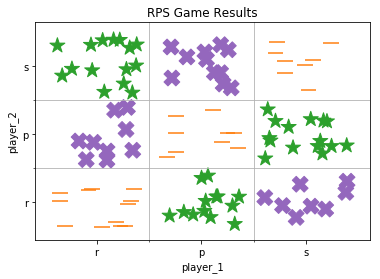

In [192]:
options={'r': 1, 'p': 2, 's': 3}
colors={'Tie': 'C1', 'Player 1 Win': 'C2', 'Player 1 Lose': 'C4'}
markers={'Tie': '_', 'Player 1 Win': '*', 'Player 1 Lose': 'X'}

def make_jitter(data): 
    return [random.uniform(-1, 1)*0.4+element for element in data]

# df.replace({**options, **colors}).plot(x='player_1', y='player_2', kind='scatter', c='result')
for each_marker in df['result'].unique():
    filter_df=df[df['result']==each_marker]
#     plt.scatter(x=make_jitter(filter_df['player_1'].replace(options)), y=make_jitter(filter_df['player_2'].replace(options)), c=filter_df['result'].replace(colors))
    plt.scatter(x=make_jitter(filter_df['player_1'].replace(options)), y=make_jitter(filter_df['player_2'].replace(options)), c=filter_df['result'].replace(colors), s=250, marker=markers[each_marker])
plt.grid(which='minor')
plt.xticks(list(options.values()), list(options.keys()))
plt.axes().set_xticks([1.5, 2.5], minor=True)
plt.axes().set_yticks([1.5, 2.5], minor=True)
plt.yticks(list(options.values()), list(options.keys()))
plt.xlabel('player_1')
plt.ylabel('player_2')
plt.title('RPS Game Results')
plt.show()
# options
# for each_option_1 in df['player_1'].unique(): 
#     for each_option_2 in df['player_2'].unique(): 
#         df[(df['player_1']==each_option_1) & (df['player_2']==each_option_2)].count()

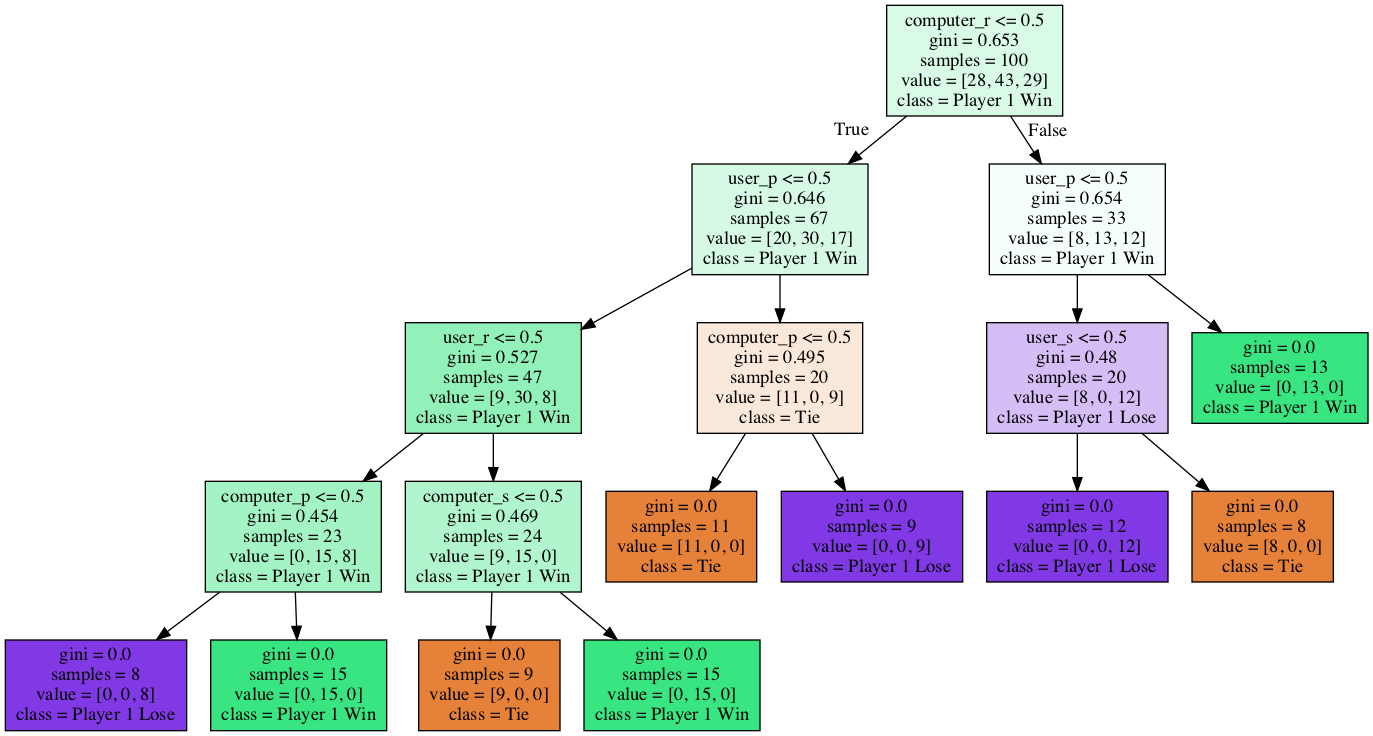

In [193]:
from IPython.display import Image
import pydotplus
dot_data=tree.export_graphviz(clf, feature_names=ohencoder.get_feature_names(['user', 'computer']), filled=True, class_names=y.unique())
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [194]:
game={'player_1': 'r', 'player_2': 'p'}
# game_transformed=ohencoder.transform(pd.DataFrame(game))
game_transformed=ohencoder.transform([list(game.values())])
clf.predict(game_transformed)

array(['Player 1 Lose'], dtype=object)

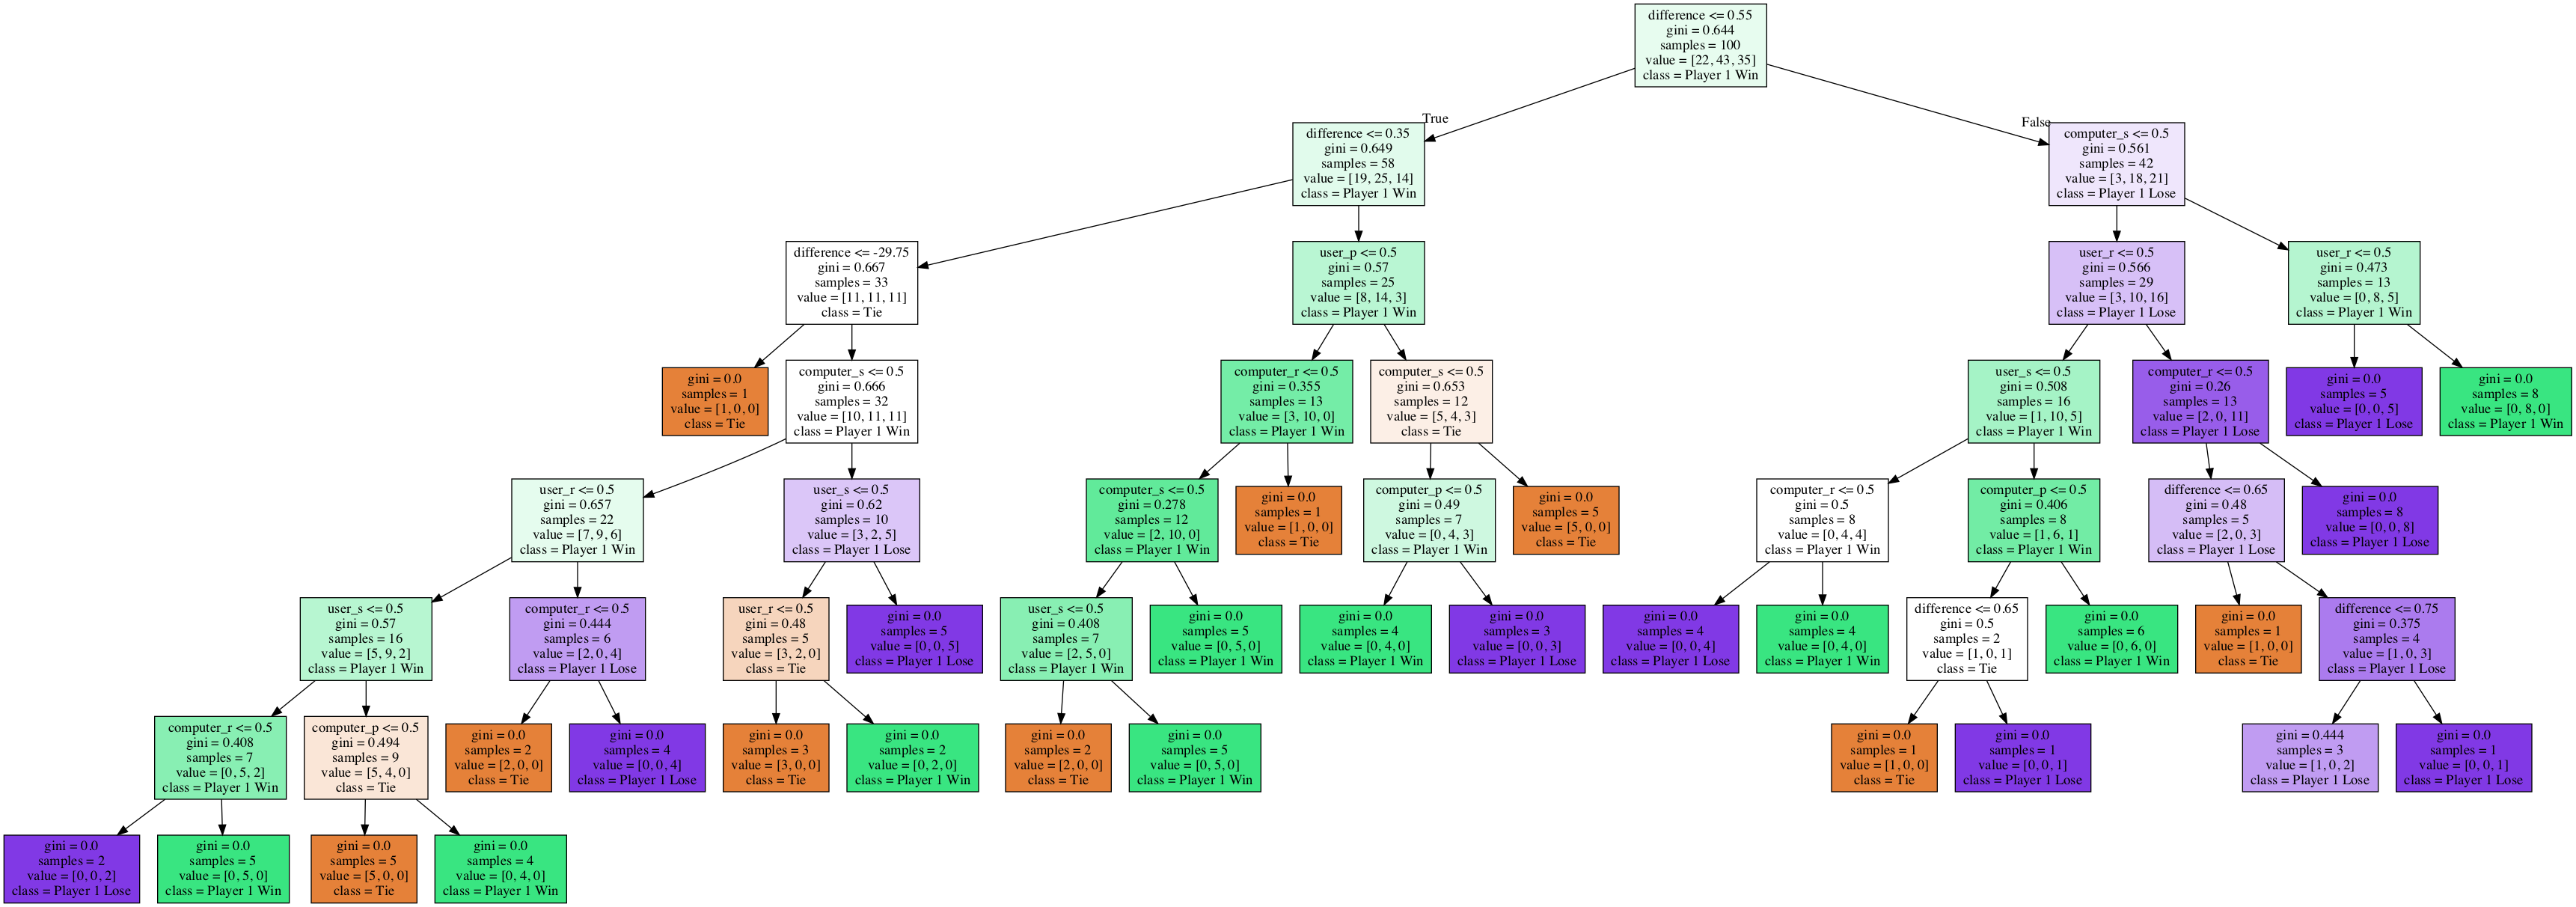

In [195]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
import pydotplus

df=pd.read_csv('result/result_complex.csv', header=None, names=['player_1', 'player_2', 'first_time', 'second_time', 'result'])
df['difference']=df.iloc[:, 3].str.split(':').str[-1].astype(float)-df.iloc[:, 2].str.split(':').str[-1].astype(float)
# pd.to_datetime(df.iloc[:, 2:3])
df
X=df[['player_1', 'player_2']]
ohencoder=OneHotEncoder()
X_transformed=ohencoder.fit_transform(X)
X_transformed=pd.DataFrame(X_transformed.toarray(), columns=ohencoder.get_feature_names(['user', 'computer']))
X_transformed['difference']=df['difference']
y=df['result']
clf=tree.DecisionTreeClassifier()
clf.fit(X_transformed, y)

dot_data=tree.export_graphviz(clf, feature_names=X_transformed.columns, filled=True, class_names=y.unique())
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

/Users/kevinlee/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


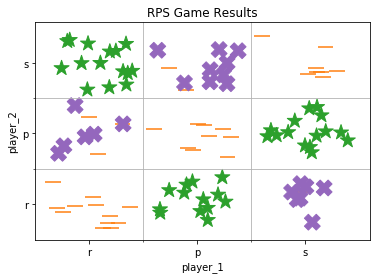

In [196]:
options={'r': 1, 'p': 2, 's': 3}
colors={'Tie': 'C1', 'Player 1 Win': 'C2', 'Player 1 Lose': 'C4'}
markers={'Tie': '_', 'Player 1 Win': '*', 'Player 1 Lose': 'X'}

def make_jitter(data): 
    return [random.uniform(-1, 1)*0.4+element for element in data]

# df.replace({**options, **colors}).plot(x='player_1', y='player_2', kind='scatter', c='result')
for each_marker in df['result'].unique():
    filter_df=df[df['result']==each_marker]
#     plt.scatter(x=make_jitter(filter_df['player_1'].replace(options)), y=make_jitter(filter_df['player_2'].replace(options)), c=filter_df['result'].replace(colors))
    plt.scatter(x=make_jitter(filter_df['player_1'].replace(options)), y=make_jitter(filter_df['player_2'].replace(options)), c=filter_df['result'].replace(colors), s=250, marker=markers[each_marker])
plt.grid(which='minor')
plt.xticks(list(options.values()), list(options.keys()))
plt.axes().set_xticks([1.5, 2.5], minor=True)
plt.axes().set_yticks([1.5, 2.5], minor=True)
plt.yticks(list(options.values()), list(options.keys()))
plt.xlabel('player_1')
plt.ylabel('player_2')
plt.title('RPS Game Results')
plt.show()
# options
# for each_option_1 in df['player_1'].unique(): 
#     for each_option_2 in df['player_2'].unique(): 
#         df[(df['player_1']==each_option_1) & (df['player_2']==each_option_2)].count()

In [199]:
df['difference_bin']=pd.cut(df['difference'], bins=[0, 0.8, 1])
df.groupby(['difference_bin', 'player_1', 'player_2']).count()

first_time  second_time  result  difference
difference_bin player_1 player_2                                             
(0.0, 0.8]     p        p                8.0          8.0     8.0         8.0
                        r               11.0         11.0    11.0        11.0
                        s                8.0          8.0     8.0         8.0
               r        p                8.0          8.0     8.0         8.0
                        r                8.0          8.0     8.0         8.0
                        s               14.0         14.0    14.0        14.0
               s        p               13.0         13.0    13.0        13.0
                        r                8.0          8.0     8.0         8.0
                        s                6.0          6.0     6.0         6.0
(0.8, 1.0]     p        p                1.0          1.0     1.0         1.0
                        r                1.0          1.0     1.0         1.0
                        s                1.0          1.0     1.0         1.0
               r        p                1.0          1.0     1.0         1.0
                        r                2.0          2.0     2.0         2.0
                        s                1.0          1.0     1.0         1.0
               s        p                2.0          2.0     2.0         2.0
                        r                NaN          NaN     NaN         NaN
                        s                2.0          2.0     2.0         2.0